# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Arizona/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Arizona/Overlays


## Overlay Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/AMA_and_INA2.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/AMA_and_INA2.zip', compression=dict(method='zip', archive_name='AMA_and_INA2.csv'), index=False)

print(len(dfin1))
dfin1.head()

8


,OBJECTID,BASIN_NAME,NAME_ABBR,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,1,SANTA CRUZ AMA,SCA,2.24518,0.17623,"POLYGON ((-111.19921 31.8582, -111.19889 31.85...",ov0
1,2,PRESCOTT AMA,PRE,1.93099,0.12240,"POLYGON ((-112.56133 34.72246, -112.5612 34.72...",ov1
2,3,HARQUAHALA INA,HAR,2.36600,0.19248,"POLYGON ((-113.30172 33.83494, -113.30158 33.8...",ov2
3,4,JOSEPH CITY INA,JCI,0.98562,0.04618,"POLYGON ((-110.27111 34.99601, -110.27092 34.9...",ov3
4,5,PHOENIX AMA,PHX,8.37192,1.35427,"POLYGON ((-112.06644 34.00006, -112.06605 34.0...",ov4


In [4]:
#Create Effective Date df
dfeffdate = pd.DataFrame()
dfeffdate["Name"] = dfin1["BASIN_NAME"]
Effective_Date = ["7/1/1994", "6/12/1980", "1/1/1981", "12/16/1974", "6/12/1980", "6/12/1980", "12/1/2022", "6/12/1980"]
dfin1["Effective_Date"] = Effective_Date

In [5]:
# split up AMA and INA data  into two dataframes
dfin2 = dfin1[dfin1['BASIN_NAME'].str.contains("AMA") == False]
dfin1 = dfin1[dfin1['BASIN_NAME'].str.contains("AMA") == True]
print(dfin1)
dfin2

   OBJECTID      BASIN_NAME NAME_ABBR  Shape_Leng  Shape_Area  \
0         1  SANTA CRUZ AMA       SCA     2.24518     0.17623   
1         2    PRESCOTT AMA       PRE     1.93099     0.12240   
4         5     PHOENIX AMA       PHX     8.37192     1.35427   
5         6      TUCSON AMA       TUC     6.07367     0.95858   
7         8       PINAL AMA       PIN     6.58236     1.01998   

                                            geometry WaDEUUID Effective_Date  
0  POLYGON ((-111.19921 31.8582, -111.19889 31.85...      ov0       7/1/1994  
1  POLYGON ((-112.56133 34.72246, -112.5612 34.72...      ov1      6/12/1980  
4  POLYGON ((-112.06644 34.00006, -112.06605 34.0...      ov4      6/12/1980  
5  POLYGON ((-110.92813 32.81227, -110.9285 32.81...      ov5      6/12/1980  
7  POLYGON ((-111.21416 33.18288, -111.21472 33.1...      ov7      6/12/1980  


,OBJECTID,BASIN_NAME,NAME_ABBR,Shape_Leng,Shape_Area,geometry,WaDEUUID,Effective_Date
2,3,HARQUAHALA INA,HAR,2.36600,0.19248,"POLYGON ((-113.30172 33.83494, -113.30158 33.8...",ov2,1/1/1981
3,4,JOSEPH CITY INA,JCI,0.98562,0.04618,"POLYGON ((-110.27111 34.99601, -110.27092 34.9...",ov3,12/16/1974
6,7,DOUGLAS INA,DIN,1.91029,0.13655,"POLYGON ((-109.49467 31.33405, -109.50064 31.3...",ov6,12/1/2022


In [6]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "10/13/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "AZov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1['BASIN_NAME']
df['in_ReportingUnitNativeID'] = "ama" + dfin1['OBJECTID'].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Active Management Areas"
df['in_ReportingUnitUpdateDate'] = "1/10/2023"
df['in_StateCV'] = "AZ"
df['in_Geometry'] = dfin1['geometry']

# Overlay Info
df['in_OversightAgency'] = "Arizona Department of Water Resources"
df['in_OverlayDescription'] = "To safeguard the health, safety and economic welfare of the public by protecting, conserving and enhancing Arizona's water supplies in a bold, thoughtful and innovative manner."
df['in_OverlayName'] = dfin1['BASIN_NAME']
df['in_OverlayNativeID'] = "ama" + dfin1['OBJECTID'].astype(str)
df['in_OverlayStatusCV'] = "Active"
df['in_Statute'] = ""
df['in_StatuteLink'] =""
df['in_StatutoryEffectiveDate'] = dfin1['Effective_Date']
df['in_StatutoryEndDate'] = ""
df['in_OverlayTypeCV'] = "Active Management Areas"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

5


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_OverlayDescription,in_OverlayName,in_OverlayNativeID,in_OverlayStatusCV,in_Statute,in_StatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_OverlayTypeCV,in_WaterSourceTypeCV
0,ov0,10/13/2023,2023,AZov_O1,4326,SANTA CRUZ AMA,ama1,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-111.19921 31.8582, -111.19889 31.85...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",SANTA CRUZ AMA,ama1,Active,,,7/1/1994,,Active Management Areas,Groundwater
1,ov1,10/13/2023,2023,AZov_O1,4326,PRESCOTT AMA,ama2,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-112.56133 34.72246, -112.5612 34.72...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PRESCOTT AMA,ama2,Active,,,6/12/1980,,Active Management Areas,Groundwater
2,ov4,10/13/2023,2023,AZov_O1,4326,PHOENIX AMA,ama5,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-112.06644 34.00006, -112.06605 34.0...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PHOENIX AMA,ama5,Active,,,6/12/1980,,Active Management Areas,Groundwater
3,ov5,10/13/2023,2023,AZov_O1,4326,TUCSON AMA,ama6,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-110.92813 32.81227, -110.9285 32.81...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",TUCSON AMA,ama6,Active,,,6/12/1980,,Active Management Areas,Groundwater
4,ov7,10/13/2023,2023,AZov_O1,4326,PINAL AMA,ama8,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-111.21416 33.18288, -111.21472 33.1...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PINAL AMA,ama8,Active,,,6/12/1980,,Active Management Areas,Groundwater


## Overlay Area #2

In [7]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin2['WaDEUUID']

# Date Info
df['in_Date'] = "10/13/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "AZov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin2['BASIN_NAME']
df['in_ReportingUnitNativeID'] = "ina" + dfin2['OBJECTID'].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Irrigation Non-Expansion Areas"
df['in_ReportingUnitUpdateDate'] = "1/10/2023"
df['in_StateCV'] = "AZ"
df['in_Geometry'] = dfin2['geometry']

# Overlay Info
df['in_OversightAgency'] = "Arizona Department of Water Resources"
df['in_OverlayDescription'] = "To safeguard the health, safety and economic welfare of the public by protecting, conserving and enhancing Arizona's water supplies in a bold, thoughtful and innovative manner."
df['in_OverlayName'] = dfin2['BASIN_NAME']
df['in_OverlayNativeID'] = "ina" + dfin2['OBJECTID'].astype(str)
df['in_OverlayStatusCV'] = "Active"
df['in_Statute'] = ""
df['in_StatuteLink'] =""
df['in_StatutoryEffectiveDate'] = dfin2['Effective_Date']
df['in_StatutoryEndDate'] = ""
df['in_OverlayTypeCV'] = "Irrigation Non-Expansion Areas"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf2 = df.copy()
print(len(outdf2))
outdf2.head()

3


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_OverlayDescription,in_OverlayName,in_OverlayNativeID,in_OverlayStatusCV,in_Statute,in_StatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_OverlayTypeCV,in_WaterSourceTypeCV
0,ov2,10/13/2023,2023,AZov_O1,4326,HARQUAHALA INA,ina3,,Irrigation Non-Expansion Areas,1/10/2023,AZ,"POLYGON ((-113.30172 33.83494, -113.30158 33.8...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",HARQUAHALA INA,ina3,Active,,,1/1/1981,,Irrigation Non-Expansion Areas,Groundwater
1,ov3,10/13/2023,2023,AZov_O1,4326,JOSEPH CITY INA,ina4,,Irrigation Non-Expansion Areas,1/10/2023,AZ,"POLYGON ((-110.27111 34.99601, -110.27092 34.9...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",JOSEPH CITY INA,ina4,Active,,,12/16/1974,,Irrigation Non-Expansion Areas,Groundwater
2,ov6,10/13/2023,2023,AZov_O1,4326,DOUGLAS INA,ina7,,Irrigation Non-Expansion Areas,1/10/2023,AZ,"POLYGON ((-109.49467 31.33405, -109.50064 31.3...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",DOUGLAS INA,ina7,Active,,,12/1/2022,,Irrigation Non-Expansion Areas,Groundwater


## Concatenate DataFrames together

In [8]:
# Concatenate dataframes
frames = [outdf1, outdf2] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

8


## Clean Data / data types

In [9]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [10]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['SANTA CRUZ AMA', 'PRESCOTT AMA', 'PHOENIX AMA', 'TUCSON AMA',
       'PINAL AMA', 'HARQUAHALA INA', 'JOSEPH CITY INA', 'DOUGLAS INA'],
      dtype=object)

In [11]:
outdf['in_OverlayDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_OverlayDescription']), axis=1)
outdf['in_OverlayDescription'].unique()

array(["To safeguard the health, safety and economic welfare of the public by protecting, conserving and enhancing Arizona's water supplies in a bold, thoughtful and innovative manner."],
      dtype=object)

In [12]:
outdf['in_OverlayName'] = outdf.apply(lambda row: ensureEmptyString(row['in_OverlayName']), axis=1)
outdf['in_OverlayName'].unique()

array(['SANTA CRUZ AMA', 'PRESCOTT AMA', 'PHOENIX AMA', 'TUCSON AMA',
       'PINAL AMA', 'HARQUAHALA INA', 'JOSEPH CITY INA', 'DOUGLAS INA'],
      dtype=object)

In [13]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['1994-07-01 00:00:00', '1980-06-12 00:00:00', '1981-01-01 00:00:00',
 '1974-12-16 00:00:00', '2022-12-01 00:00:00']
Length: 5, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### AMA

In [14]:
# # Input File / or use same input as above

goutdf = outdf.copy()
goutdf = gpd.GeoDataFrame(goutdf, geometry=goutdf['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(goutdf))
goutdf.head()

8


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_OverlayDescription,in_OverlayName,in_OverlayNativeID,in_OverlayStatusCV,in_Statute,in_StatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_OverlayTypeCV,in_WaterSourceTypeCV,geometry
0,ov0,10/13/2023,2023,AZov_O1,4326,SANTA CRUZ AMA,ama1,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-111.19921 31.8582, -111.19889 31.85...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",SANTA CRUZ AMA,ama1,Active,,,1994-07-01,,Active Management Areas,Groundwater,"POLYGON ((-111.19921 31.8582, -111.19889 31.85..."
1,ov1,10/13/2023,2023,AZov_O1,4326,PRESCOTT AMA,ama2,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-112.56133 34.72246, -112.5612 34.72...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PRESCOTT AMA,ama2,Active,,,1980-06-12,,Active Management Areas,Groundwater,"POLYGON ((-112.56133 34.72246, -112.5612 34.72..."
2,ov4,10/13/2023,2023,AZov_O1,4326,PHOENIX AMA,ama5,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-112.06644 34.00006, -112.06605 34.0...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PHOENIX AMA,ama5,Active,,,1980-06-12,,Active Management Areas,Groundwater,"POLYGON ((-112.06644 34.00006, -112.06605 34.0..."
3,ov5,10/13/2023,2023,AZov_O1,4326,TUCSON AMA,ama6,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-110.92813 32.81227, -110.9285 32.81...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",TUCSON AMA,ama6,Active,,,1980-06-12,,Active Management Areas,Groundwater,"POLYGON ((-110.92813 32.81227, -110.9285 32.81..."
4,ov7,10/13/2023,2023,AZov_O1,4326,PINAL AMA,ama8,,Active Management Areas,1/10/2023,AZ,"POLYGON ((-111.21416 33.18288, -111.21472 33.1...",Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PINAL AMA,ama8,Active,,,1980-06-12,,Active Management Areas,Groundwater,"POLYGON ((-111.21416 33.18288, -111.21472 33.1..."


In [15]:
gdfin1 = goutdf[goutdf['in_ReportingUnitName'].str.contains("AMA") == True]

<Axes: >

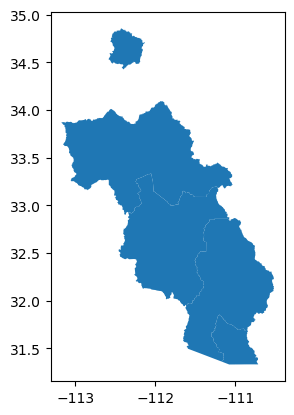

In [16]:
# plot shape info to map
gdfin1.plot()

In [17]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

print(len(goutdf1))
goutdf1.head()

5


,in_ReportingUnitNativeID,geometry
0,ama1,"POLYGON ((-111.19921 31.8582, -111.19889 31.85..."
1,ama2,"POLYGON ((-112.56133 34.72246, -112.5612 34.72..."
2,ama5,"POLYGON ((-112.06644 34.00006, -112.06605 34.0..."
3,ama6,"POLYGON ((-110.92813 32.81227, -110.9285 32.81..."
4,ama8,"POLYGON ((-111.21416 33.18288, -111.21472 33.1..."


#### INA

In [18]:
gdfin2 = goutdf[goutdf['in_ReportingUnitName'].str.contains("AMA") == False]

<Axes: >

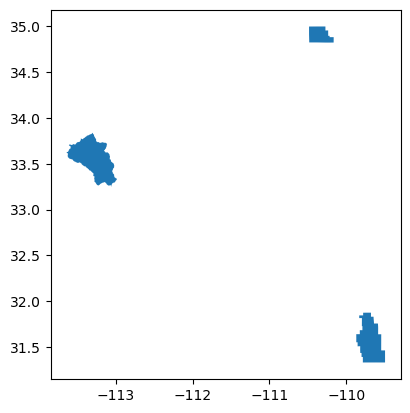

In [19]:
# plot shape info to map
gdfin2.plot()

In [20]:
# create output for Regulatory Area #2 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf2 = pd.DataFrame(columns=columnsList, index=gdfin2.index)

goutdf2['in_ReportingUnitNativeID'] =  gdfin2["in_ReportingUnitNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf2['geometry'] = gdfin2['in_Geometry']
goutdf2 = goutdf2.drop_duplicates().reset_index(drop=True)

print(len(goutdf2))
goutdf2.head()

3


,in_ReportingUnitNativeID,geometry
0,ina3,"POLYGON ((-113.30172 33.83494, -113.30158 33.8..."
1,ina4,"POLYGON ((-110.27111 34.99601, -110.27092 34.9..."
2,ina7,"POLYGON ((-109.49467 31.33405, -109.50064 31.3..."


#### Concatenate goutdf shapefile info into single output

In [21]:
# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)

In [22]:
# Concatenate Geometry DataFrames
frames = [goutdf1, goutdf2] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

8


,in_ReportingUnitNativeID,geometry
0,ama1,"POLYGON ((-111.19921 31.8582, -111.19889 31.85..."
1,ama2,"POLYGON ((-112.56133 34.72246, -112.5612 34.72..."
2,ama5,"POLYGON ((-112.06644 34.00006, -112.06605 34.0..."
3,ama6,"POLYGON ((-110.92813 32.81227, -110.9285 32.81..."
4,ama8,"POLYGON ((-111.21416 33.18288, -111.21472 33.1..."


## Export Data

In [23]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   WaDEUUID                        8 non-null      object        
 1   in_Date                         8 non-null      object        
 2   in_Year                         8 non-null      object        
 3   in_OrganizationUUID             8 non-null      object        
 4   in_EPSGCodeCV                   8 non-null      object        
 5   in_ReportingUnitName            8 non-null      object        
 6   in_ReportingUnitNativeID        8 non-null      object        
 7   in_ReportingUnitProductVersion  8 non-null      object        
 8   in_ReportingUnitTypeCV          8 non-null      object        
 9   in_ReportingUnitUpdateDate      8 non-null      object        
 10  in_StateCV                      8 non-null      object        
 11  in_Oversig

In [24]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_OverlayDescription,in_OverlayName,in_OverlayNativeID,in_OverlayStatusCV,in_Statute,in_StatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_OverlayTypeCV,in_WaterSourceTypeCV
0,ov0,10/13/2023,2023,AZov_O1,4326,SANTA CRUZ AMA,ama1,,Active Management Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",SANTA CRUZ AMA,ama1,Active,,,1994-07-01,,Active Management Areas,Groundwater
1,ov1,10/13/2023,2023,AZov_O1,4326,PRESCOTT AMA,ama2,,Active Management Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PRESCOTT AMA,ama2,Active,,,1980-06-12,,Active Management Areas,Groundwater
2,ov4,10/13/2023,2023,AZov_O1,4326,PHOENIX AMA,ama5,,Active Management Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PHOENIX AMA,ama5,Active,,,1980-06-12,,Active Management Areas,Groundwater
3,ov5,10/13/2023,2023,AZov_O1,4326,TUCSON AMA,ama6,,Active Management Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",TUCSON AMA,ama6,Active,,,1980-06-12,,Active Management Areas,Groundwater
4,ov7,10/13/2023,2023,AZov_O1,4326,PINAL AMA,ama8,,Active Management Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",PINAL AMA,ama8,Active,,,1980-06-12,,Active Management Areas,Groundwater
5,ov2,10/13/2023,2023,AZov_O1,4326,HARQUAHALA INA,ina3,,Irrigation Non-Expansion Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",HARQUAHALA INA,ina3,Active,,,1981-01-01,,Irrigation Non-Expansion Areas,Groundwater
6,ov3,10/13/2023,2023,AZov_O1,4326,JOSEPH CITY INA,ina4,,Irrigation Non-Expansion Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",JOSEPH CITY INA,ina4,Active,,,1974-12-16,,Irrigation Non-Expansion Areas,Groundwater
7,ov6,10/13/2023,2023,AZov_O1,4326,DOUGLAS INA,ina7,,Irrigation Non-Expansion Areas,1/10/2023,AZ,Arizona Department of Water Resources,"To safeguard the health, safety and economic w...",DOUGLAS INA,ina7,Active,,,2022-12-01,,Irrigation Non-Expansion Areas,Groundwater


In [25]:
goutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   in_ReportingUnitNativeID  8 non-null      object  
 1   geometry                  8 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 260.0+ bytes


In [26]:
goutdf

,in_ReportingUnitNativeID,geometry
0,ama1,"POLYGON ((-111.19921 31.8582, -111.19889 31.85..."
1,ama2,"POLYGON ((-112.56133 34.72246, -112.5612 34.72..."
2,ama5,"POLYGON ((-112.06644 34.00006, -112.06605 34.0..."
3,ama6,"POLYGON ((-110.92813 32.81227, -110.9285 32.81..."
4,ama8,"POLYGON ((-111.21416 33.18288, -111.21472 33.1..."
5,ina3,"POLYGON ((-113.30172 33.83494, -113.30158 33.8..."
6,ina4,"POLYGON ((-110.27111 34.99601, -110.27092 34.9..."
7,ina7,"POLYGON ((-109.49467 31.33405, -109.50064 31.3..."


In [27]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.